# Dengue Trend Over Time

### Data File Creation

This is synthetic data to test program. This can be relaced with real data

In [7]:
import pandas as pd
import numpy as np
import datetime

# Parameters for synthetic data
start_date = '2020-01-01'
end_date = '2023-12-31'
date_range = pd.date_range(start_date, end_date, freq='D')

# Generate random data for dengue cases
np.random.seed(42)  # For reproducibility
cases = np.random.poisson(lam=20, size=len(date_range))  # Using Poisson distribution for daily cases

# Create DataFrame
data = pd.DataFrame({'Date': date_range, 'Cases': cases})
print(data.head())

# Save to CSV
file_path = 'synthetic-dengue-cases.csv'
data.to_csv(file_path, index=False)

print()
print(f"CSV file generated: {file_path}")


        Date  Cases
0 2020-01-01     23
1 2020-01-02     15
2 2020-01-03     21
3 2020-01-04     25
4 2020-01-05     15

CSV file generated: synthetic-dengue-cases.csv


### Program to generate the line plot

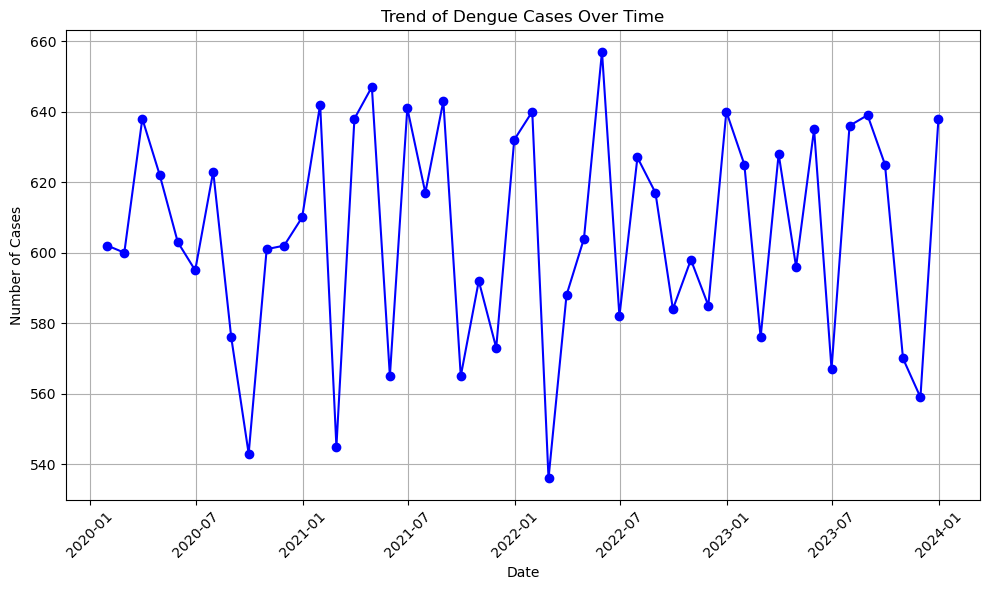

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# Replace 'dengue_cases.csv' with your actual file path
df = pd.read_csv('synthetic-dengue-cases.csv')

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Resample the data to get monthly totals
monthly_cases = df.resample('M').sum()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_cases.index, monthly_cases['Cases'], marker='o', linestyle='-', color='b')
plt.title('Trend of Dengue Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
